In [1]:
import numpy as np 
import pandas as pd 
import re
pd.set_option('precision', 0)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale = 1.5)
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
files.upload();

Saving vgames2.csv to vgames2.csv


In [3]:
df = pd.read_csv('vgames2.csv', index_col = 0)
df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.00,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.00,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.00,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.00,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.00,Platform,D3Publisher,0.12,0.09,0,0.04
6,Power Pro Kun Pocket 8,DS,2005.00,Sports,Konami Digital Entertainment,0,0,0.14,0
7,JASF: Jane's Advanced Strike Fighters,PC,2011.00,Simulation,Deep Silver,0.02,0.01,0,0
8,Samurai Warriors: State of War,PSP,2005.00,Action,Tecmo Koei,0.07,0,0.11,0.01
9,Imabikisou,PS3,2007.00,Adventure,Sega,0,0,0.04,0
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.00,Action,THQ,0.04,0.03,0,0.01


In [4]:
df.loc[df['Year'] < 1800,:].value_counts(df['Year'])

Year
11.00    10
8.00     10
9.00     10
3.00      7
6.00      7
10.00     7
15.00     5
16.00     5
4.00      4
5.00      4
95.00     4
96.00     3
0.00      3
7.00      3
2.00      3
98.00     3
13.00     2
14.00     2
12.00     2
1.00      2
97.00     2
86.00     1
94.00     1
dtype: int64

In [5]:
# 50 이상인 데이터는 1950~2000 데이터로판단
# 50 이하인 데이터는 2000년 이후 데이터로 판단
def correct_Year(value):
  if (value < 1800) & (50 < value):
    value = value + 1900
    return value
  elif value < 50:
    value = value + 2000
    return value
  else:
    return value

In [6]:
# 연도데이터 수정
# 연도 데이터는 연도데이터끼리 연산이 필요하지도 않고, 연도별 데이터를 group by 하기위해 문자형 데이터로 바꾸는게 맞다고 생각
df['Year'] = df['Year'].apply(correct_Year).astype(pd.Int64Dtype()).astype(str)
# correct_year 함수로 연도데이터 수정
# astype(pd.Int64Dtype())로 nan 값 제외한 나머지 연도데이터 정수로 변환
# astype(str) 로 문자형으로 변환

In [7]:
# K 는 1000 M 은 1000000 으로 변환
# K,M 으로 표기되지않는 데이터는 냅둠
def correct_scale(value):
  if value[-1] == 'K':
    value = value.replace('K','')
    value = float(value)*0.001
    return value
  elif value[-1] == 'M':
    value = value.replace('M','')
    return value
  else:
      return value

In [8]:
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'].apply(correct_scale))
df['EU_Sales'] = pd.to_numeric(df['EU_Sales'].apply(correct_scale))
df['JP_Sales'] = pd.to_numeric(df['JP_Sales'].apply(correct_scale))
df['Other_Sales'] = pd.to_numeric(df['Other_Sales'].apply(correct_scale))

In [9]:
#장르별 누적 판매량
groupby_genre = df.groupby('Genre', as_index=False).sum()
groupby_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,874.81,522.16,157.90,186.45
1,Adventure,105.66,64.05,51.95,16.81
2,Fighting,223.20,101.22,87.34,36.64
3,Misc,408.05,212.36,105.27,74.04
4,Platform,446.44,201.61,130.65,51.53
5,Puzzle,123.35,50.73,56.87,12.52
6,Racing,357.19,237.10,56.40,77.10
7,Role-Playing,319.54,183.58,344.95,56.96
8,Shooter,581.92,313.05,38.28,102.65
9,Simulation,182.96,113.35,63.70,31.48


In [10]:
#장르를 기준으로 그룹화, 내림차순 정렬
na_prefer = groupby_genre.loc[:,['Genre', 'NA_Sales']].sort_values(by = 'NA_Sales', ascending = False).reset_index(drop= True)
eu_prefer = groupby_genre.loc[:,['Genre', 'EU_Sales']].sort_values(by = 'EU_Sales', ascending = False).reset_index(drop= True)
jp_prefer = groupby_genre.loc[:,['Genre', 'JP_Sales']].sort_values(by = 'JP_Sales', ascending = False).reset_index(drop= True)
ot_prefer = groupby_genre.loc[:,['Genre', 'Other_Sales']].sort_values(by = 'Other_Sales', ascending = False).reset_index(drop= True)

In [11]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"))
fig.add_bar(x = na_prefer['Genre'], y =na_prefer['NA_Sales'], name = 'NA_Sales', row = 1, col = 1)
fig.add_bar(x = eu_prefer['Genre'], y = eu_prefer['EU_Sales'], name = 'EU_Sales', row = 1, col = 2)
fig.add_bar(x = jp_prefer['Genre'], y = jp_prefer['JP_Sales'], name = 'JP_Sales', row = 2, col = 1)
fig.add_bar(x = ot_prefer['Genre'], y = ot_prefer['Other_Sales'], name = 'Other_Sales', row = 2, col = 2)

In [13]:
#연도별 지역 게임 시장규모
groupby_year = df.groupby('Year', as_index = False).sum()
groupby_year['Total_Sales'] = groupby_year.sum(axis =1)
groupby_year

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1980,10.59,0.67,0.00,0.12,11.38
1,1981,33.40,1.96,0.00,0.32,35.68
2,1982,26.92,1.65,0.00,0.31,28.88
3,1983,7.76,0.80,8.10,0.14,16.80
4,1984,33.28,2.10,14.27,0.70,50.35
5,1985,33.73,4.74,14.56,0.92,53.95
6,1986,12.50,2.84,19.81,1.93,37.08
7,1987,8.46,1.41,11.63,0.20,21.70
8,1988,23.87,6.59,15.76,0.99,47.21
9,1989,45.15,8.44,18.36,1.50,73.45


In [14]:
#연도 및 장르별 판매량
df_groupby = df.groupby(['Year','Genre'], as_index = False).sum()
df_groupby['Total_Sales'] = df_groupby.iloc[:,2:].sum(axis = 1)
df_groupby

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1980,Action,0.32,0.02,0.00,0.00,0.34
1,1980,Fighting,0.72,0.04,0.00,0.01,0.77
2,1980,Misc,2.53,0.15,0.00,0.02,2.70
3,1980,Shooter,6.56,0.43,0.00,0.08,7.07
4,1981,Action,13.86,0.81,0.00,0.12,14.79
...,...,...,...,...,...,...,...
395,<NA>,Role-Playing,0.78,0.48,2.02,0.23,3.51
396,<NA>,Shooter,7.44,2.82,0.10,0.79,11.15
397,<NA>,Simulation,1.53,0.18,0.16,0.16,2.03
398,<NA>,Sports,13.26,5.51,0.61,2.32,21.70


In [15]:
#연도별 게임트랜드 판매율
fig = px.line(groupby_year, x='Year', y='Total_Sales', title='Game Trend : Total Sales')
fig.show()

In [17]:
#게임장르별 트랜드 
fig2 = px.line(df_groupby, x='Year', y='Total_Sales', color = 'Genre', title = 'Game Trend : Genre')
fig2.show()

In [18]:
df_title = df.groupby('Name', as_index = False).sum()
df_title['Total_Sales'] = df_title.iloc[:,1:].sum(axis = 1)
df_title = df_title.sort_values(by = 'Total_Sales', ascending = False).head(20)
df_name = df.loc[:,['Name','Publisher']]
df_title = pd.merge(df_title, df_name, how='left', on='Name').drop_duplicates().reset_index(drop=True)

<BarContainer object of 3 artists>

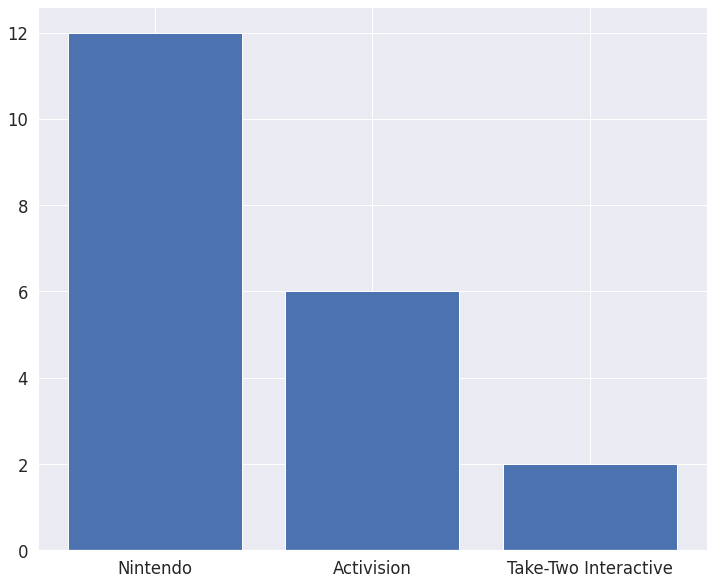

In [19]:
publisher_count = df_title['Publisher'].value_counts()
plt.figure(figsize=(12,10))
plt.bar(publisher_count.index, publisher_count)

In [ ]:
#게임 데이터중 중복값이 있음, 하나의 게임을 여러 플렛폼에서 즐길수있는걸로 확인
#데이터를 게임이름으로 그룹화 하여 하나의 게임 총판매량을 구하고, 판매량 상위 20개의 게임을 조사한 결과 닌텐도가 12개 엑티비젼이 6개 그외 2개로나옴

#다음분기에 어떻게 게임을 설계 해야하는가